<table align="left">
    <tr>
        <td bgcolor="#FFFFFF">
            <img src="img/scca_data_science_logo.png" width="20%" align="left">
        </td>
    </tr>
    <tr>
        <td>
            <p align="left">
                <font size="4">
                    <b>SCCA Data Science</b>
                </font>
            </p> 
        </td>
    </tr>
</table>


<img src="img/kraken.jpeg" width="5%" align="left">

# GLM

## Overview


## Ad Hoc Request


### Requester
- FirstName Lastname, Credentials
    - email:  
    - role:   
    - office: 
    
### Data Science PM
- Assigned to:
    - FirstName, LastName
    - email: user@seattlecca.org
    - role: Data Scientist

### Deliverables



## Research
 

### Reference


## Jupyter Config

In [1]:
# Expand cell width to 100% browser width for Jupyter notebook
display("text/html", "<style>.container { width:100% !important; }</style>")

<img src="img/julia.png" width="10%" align="left">

## Julia Environment Configuration

In [2]:
using Pkg;

In [3]:
Pkg.activate("../")

"/home/dhughes/myr/glm/Project.toml"

In [4]:
Pkg.status()

    Status `~/myr/glm/Project.toml`
  [4f1ea46c]   AWSCore v0.6.0
  [0d499d91]   AWSSDK v0.4.0
  [336ed68f]   CSV v0.4.3
  [a93c6f00]   DataFrames v0.17.1
  [5721bf48] + DataVoyager v0.3.1
  [38e38edf]   GLM v1.1.1
  [ce6b1742] + RDatasets v0.6.1
  [f3b207a7]   StatsPlots v0.10.2


In [5]:
using CSV;
using GLM;
using RDatasets;
using AWSCore;
using AWSSDK.S3;
using StatsPlots;
using DataFrames;

In [6]:
# Plotting Constant
const plt = StatsPlots;

In [7]:
# Set plotting backend
#pyplot();

## Data Acquistion

In [8]:
LifeCycleSavings = dataset("datasets", "LifeCycleSavings");

## Data Engineering

## EDA (Exploratory Data Analysis)

In [9]:
first(LifeCycleSavings, 3)

,Country,SR,Pop15,Pop75,DPI,DDPI
,String⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,Australia,11.43,29.35,2.87,2329.68,2.87
2,Austria,12.07,23.32,4.41,1507.99,3.93
3,Belgium,13.17,23.8,4.43,2108.47,3.82


In [10]:
last(LifeCycleSavings, 3)

,Country,SR,Pop15,Pop75,DPI,DDPI
,String⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,Uruguay,9.24,28.13,2.72,766.54,1.88
2,Libya,8.89,43.69,2.07,123.58,16.71
3,Malaysia,4.71,47.2,0.66,242.69,5.08


In [11]:
names(LifeCycleSavings)

6-element Array{Symbol,1}:
 :Country
 :SR     
 :Pop15  
 :Pop75  
 :DPI    
 :DDPI   

In [12]:
describe(LifeCycleSavings)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Int64,DataType
1,Country,,Australia,,Zambia,50,0,String
2,SR,9.671,0.6,10.51,21.1,,0,Float64
3,Pop15,35.0896,21.44,32.575,47.64,,0,Float64
4,Pop75,2.293,0.56,2.175,4.7,,0,Float64
5,DPI,1106.76,88.94,695.665,4001.89,,0,Float64
6,DDPI,3.7576,0.22,3.0,16.71,,0,Float64


In [13]:
# Shape of DataFrame
LifeCycleSavings_size = size(LifeCycleSavings)
println("Rows:\t $(LifeCycleSavings_size[1]) \nColumns: $(LifeCycleSavings_size[2])")

Rows:	 50 
Columns: 6


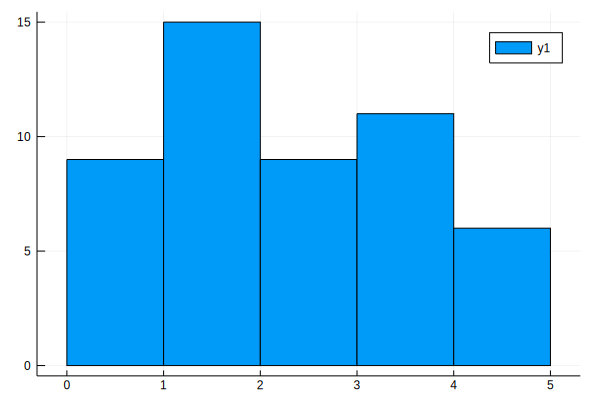

In [14]:
histogram(LifeCycleSavings.Pop75)

## Modeling

In [15]:
fm2 = fit(LinearModel, @formula(SR ~ Pop15 + Pop75 + DPI + DDPI), LifeCycleSavings)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: SR ~ 1 + Pop15 + Pop75 + DPI + DDPI

Coefficients:
                 Estimate   Std.Error   t value Pr(>|t|)
(Intercept)       28.5661     7.35452   3.88416   0.0003
Pop15           -0.461193    0.144642  -3.18851   0.0026
Pop75             -1.6915      1.0836    -1.561   0.1255
DPI          -0.000336902 0.000931107 -0.361829   0.7192
DDPI             0.409695    0.196197   2.08818   0.0425


# Output